

# <center> <font color=pink> 2éme Compte rendu:segmentation </font></center>


K-means (k-moyennes) est un  algorithme non supervisé  de clustering,il permet de regrouper en K clusters distincts les observations du data set. Ainsi les données similaires se retrouveront  dans un même cluster.Par ailleurs, une observation ne peut se retrouver que dans un cluster à la fois (exclusivité d’appartenance).Une même observation, ne pourra donc, appartenir à deux clusters différents


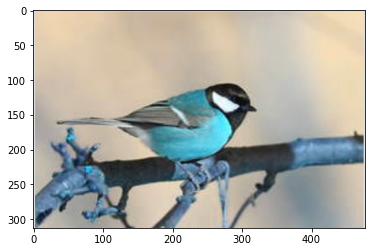

In [2]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt


image = cv2.imread('oiseau.png')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters =5)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('oiseau5.png', quant)
plt.imshow(image)

cv2.imread('oiseau.png')
cv2.waitKey(0)
cv2.destroyAllWindows()

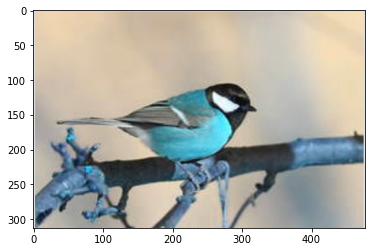

In [4]:

plt.imshow(image)

## Choisir K : le nombre de clusters
le nombre de cluster K n’est pas forcément fixé.En changeant le nombre de clusters l'image .



on remarque que le nombre de cluster fait la segmentation  de l'image en k regions .

Une stratégie simple pour identifier le nombre de classes consiste à faire varier
K et surveiller l’évolution de l''image et on sauvegarde chaque nombre de clusters dans une nouvelle image pour distinguer la difference .

on remarque que l'algoithme distingue les couleurs et fait la séparation les clusters en regroupe en des régions selon le nombre de clusters fixé manuellemnet.  

plus le nombre de clusters augmente on rapproche plus a l'image originale.

mais si on augmente le nombre K et depasse 10 , l''image va etre detorirée.

le nombre de clusters depend du domaine et du contexte dans lequel on ava utiliser l'image

# <p style="color:red;">Conclusion</p>

Pour un même jeu de données, il n’existe pas un unique clustering possible. La difficulté résidera donc à choisir un nombre de cluster K qui permettra de mettre en lumière des patterns intéressants entre les données. Malheureusement il n’existe pas de procédé automatisé pour trouver le bon nombre de clusters.


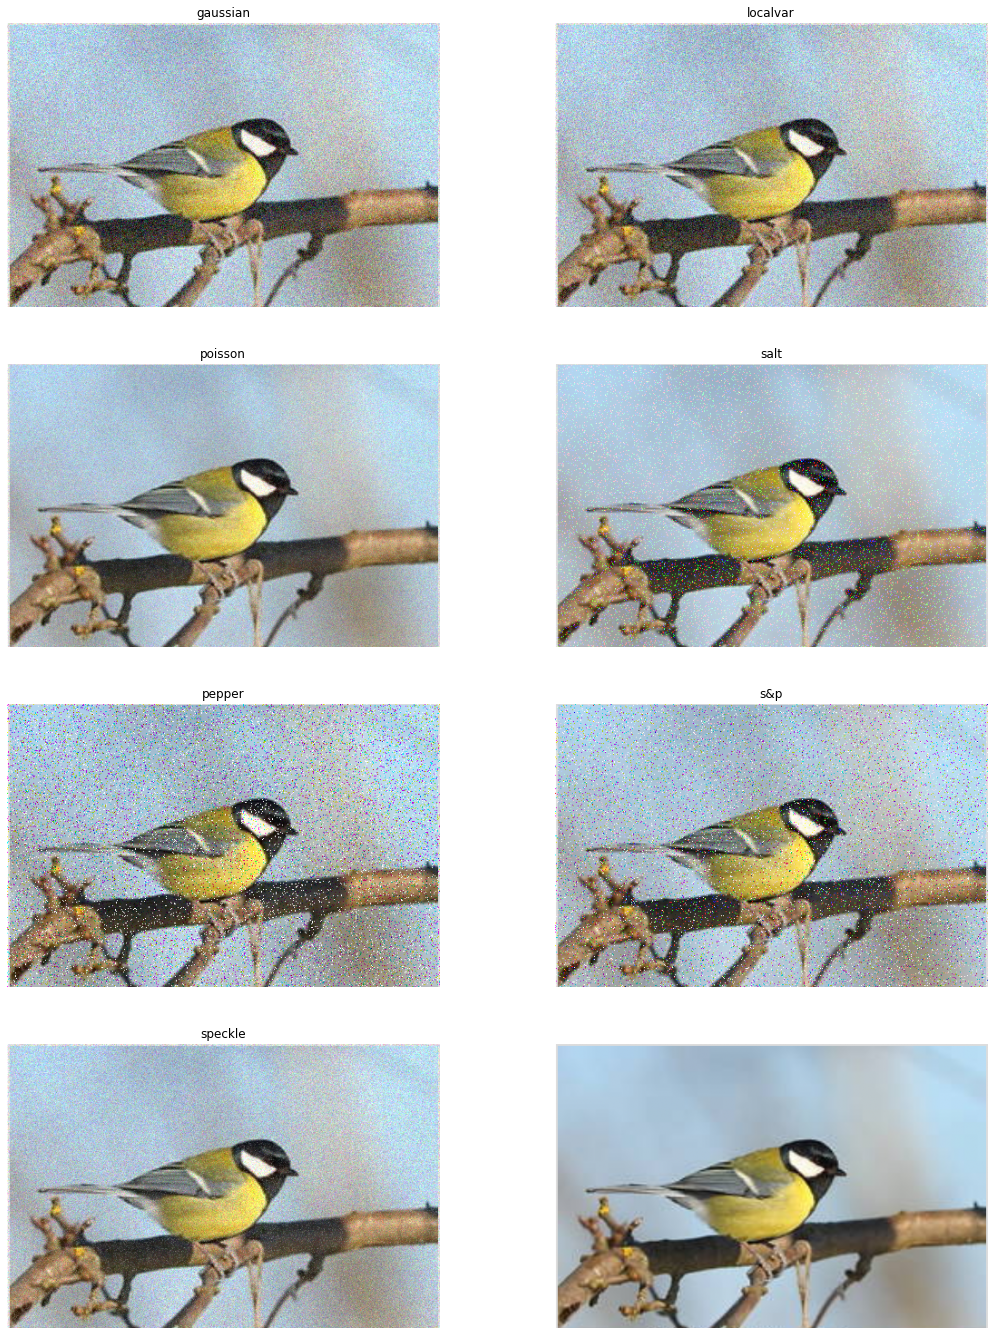

In [5]:

img_path="oiseau.png"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


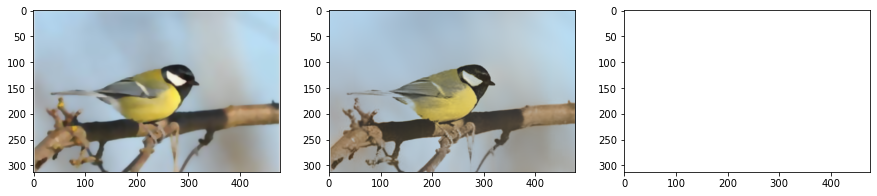

In [7]:

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise

fig, (ax0, ax1, ax2)= plt.subplots(1,3,figsize=(15,15))

ax0.imshow(denoise_tv_chambolle(img, weight=0.1, multichannel=True))
ax1.imshow(denoise_bilateral(img, sigma_color=0.05, sigma_spatial=15,multichannel=True))
ax2.imshow(denoise_wavelet(img, multichannel=True, rescale_sigma=True))
Vous avez envoyé
il y 11 minutes
#
# This file is autogenerated by pip-compile
# To update, run:
#
#    pip-compile
#
#######################
cycler==0.10.0            # via matplotlib
kiwisolver==1.2.0         # via matplotlib
matplotlib==3.2.1
numpy==1.18.5
pandas==1.0.4
pyparsing==2.4.7          # via matplotlib
python-dateutil==2.8.1    # via matplotlib, pandas
pytz==2020.1              # via pandas
scipy==1.4.1              # via seaborn
seaborn==0.10.1
six==1.15.0               # via cycler, python-dateutil

dans cette étape on va ajouter à l'image un bruit de type "s&p" puis on va l'elemine grace à la bibliothéque skimage.restoration

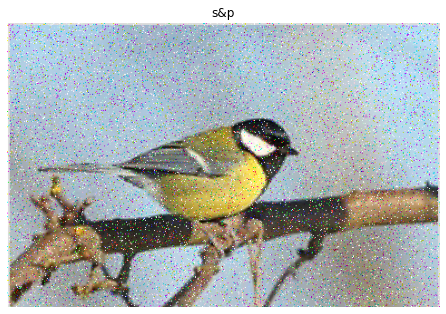

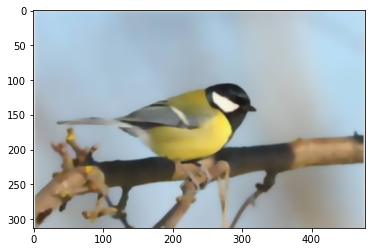

In [42]:
img_path="oiseau.png"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "s&p", r,c,1)
plt.show()
denoised_image = denoise_tv_chambolle(img,weight=0.1,multichannel=True)
plt.imshow(denoised_image)


# <h2 style="color: #d98cb3;" >observations</h2>

aprés avoir ajouter du bruit à l'image puis l'enlever on remarque que l'image devient plus lisse et plus claire que l'image originale .

In [13]:
!pip install watermark


In [17]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [23]:
%watermark -v -m -p pandas,numpy,cv2,sklearn.cluster,skimage,matplotlib

CPython 3.8.3
IPython 7.16.1

pandas 1.0.5
numpy 1.18.5
cv2 4.4.0
sklearn.cluster 0.23.1
skimage 0.16.2
matplotlib 3.2.2

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores  : 6
interpreter: 64bit
